 Summary Flow:
        rust
        Copy
        Edit
        Raw Data
        ↓
        Cleaning → Missing Handling → Encoding → Feature Engineering
        ↓
        Scaling → Splitting → Balancing (if needed)
        ↓
        Ready for Modeling



Step 1: Import Required Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as nb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

Step 2: Load the Dataset

In [37]:
# Load sample dataset
url="Telco.csv"
df=pd.read_csv(url)

In [38]:
#Understand structure, types, shape.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7044 entries, 0 to 7043
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7044 non-null   object 
 1   gender            7044 non-null   object 
 2   SeniorCitizen     7044 non-null   int64  
 3   Partner           7044 non-null   object 
 4   Dependents        7044 non-null   object 
 5   tenure            7044 non-null   int64  
 6   PhoneService      7044 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7044 non-null   object 
 9   OnlineSecurity    7044 non-null   object 
 10  OnlineBackup      7044 non-null   object 
 11  DeviceProtection  7044 non-null   object 
 12  TechSupport       7044 non-null   object 
 13  StreamingTV       7044 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7044 non-null   object 
 16  PaperlessBilling  7044 non-null   object 


Data Cleaning

In [ ]:
#summary statistics 
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7044.000000,7044.000000,7044.000000
mean,0.162124,32.372658,64.767497
std,0.368590,24.558064,30.091855
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [40]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       1
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     1
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [41]:
# Calculate mode for each column fill empty string values ("") with the most frequent (mode) value of the same column, 
mode_MultipleLines = df['MultipleLines'].mode().iloc[0]
mode_StreamingMovies=df['StreamingMovies'].mode().iloc[0]

In [42]:
df['MultipleLines'].fillna(mode_MultipleLines,inplace=True)
df['StreamingMovies'].fillna(mode_StreamingMovies,inplace=True)


In [43]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Encode the Target Column (Churn)

In [ ]:
#df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [44]:
df['Churn'] 

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7039     No
7040     No
7041    Yes
7042     No
7043     No
Name: Churn, Length: 7044, dtype: object

<Figure size 1000x600 with 0 Axes>

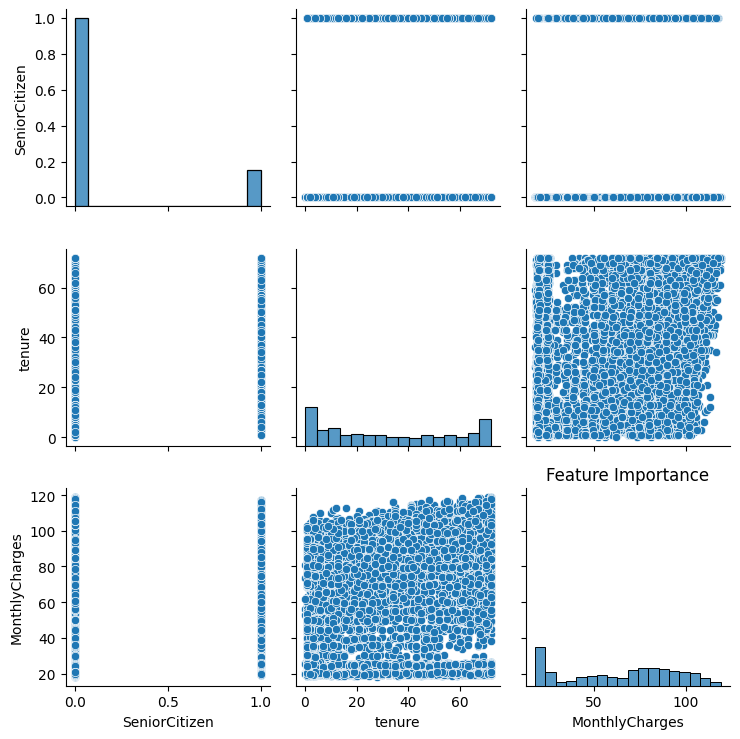

In [11]:
plt.figure(figsize=(10, 6))
sns.pairplot(data=df)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [45]:
df.drop('customerID', axis=1, inplace=True)

In [46]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [47]:
# Replace 'No internet service' and 'No phone service' with 'No' for simplicity
df.replace(['No internet service', 'No phone service'], 'No', inplace=True)


In [49]:
# Convert binary 'Yes'/'No' to 1/0
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [50]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [51]:
# Convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.fillna(0, inplace=True)

In [53]:
# One-hot encode nominal categorical columns
df = pd.get_dummies(df, drop_first=True)

In [54]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,...,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,29.85,29.85,0,False,...,True,False,False,False,False,False,False,False,True,False
1,0,0,0,34,1,0,56.95,1889.50,0,True,...,False,True,False,False,False,True,False,False,False,True
2,0,0,0,2,1,1,53.85,108.15,1,True,...,True,False,False,False,False,False,False,False,False,True
3,0,0,0,45,0,0,42.30,1840.75,0,True,...,False,True,True,False,False,True,False,False,False,False
4,0,0,0,2,1,1,70.70,151.65,1,False,...,False,False,False,False,False,False,False,False,True,False


<Figure size 1000x600 with 0 Axes>

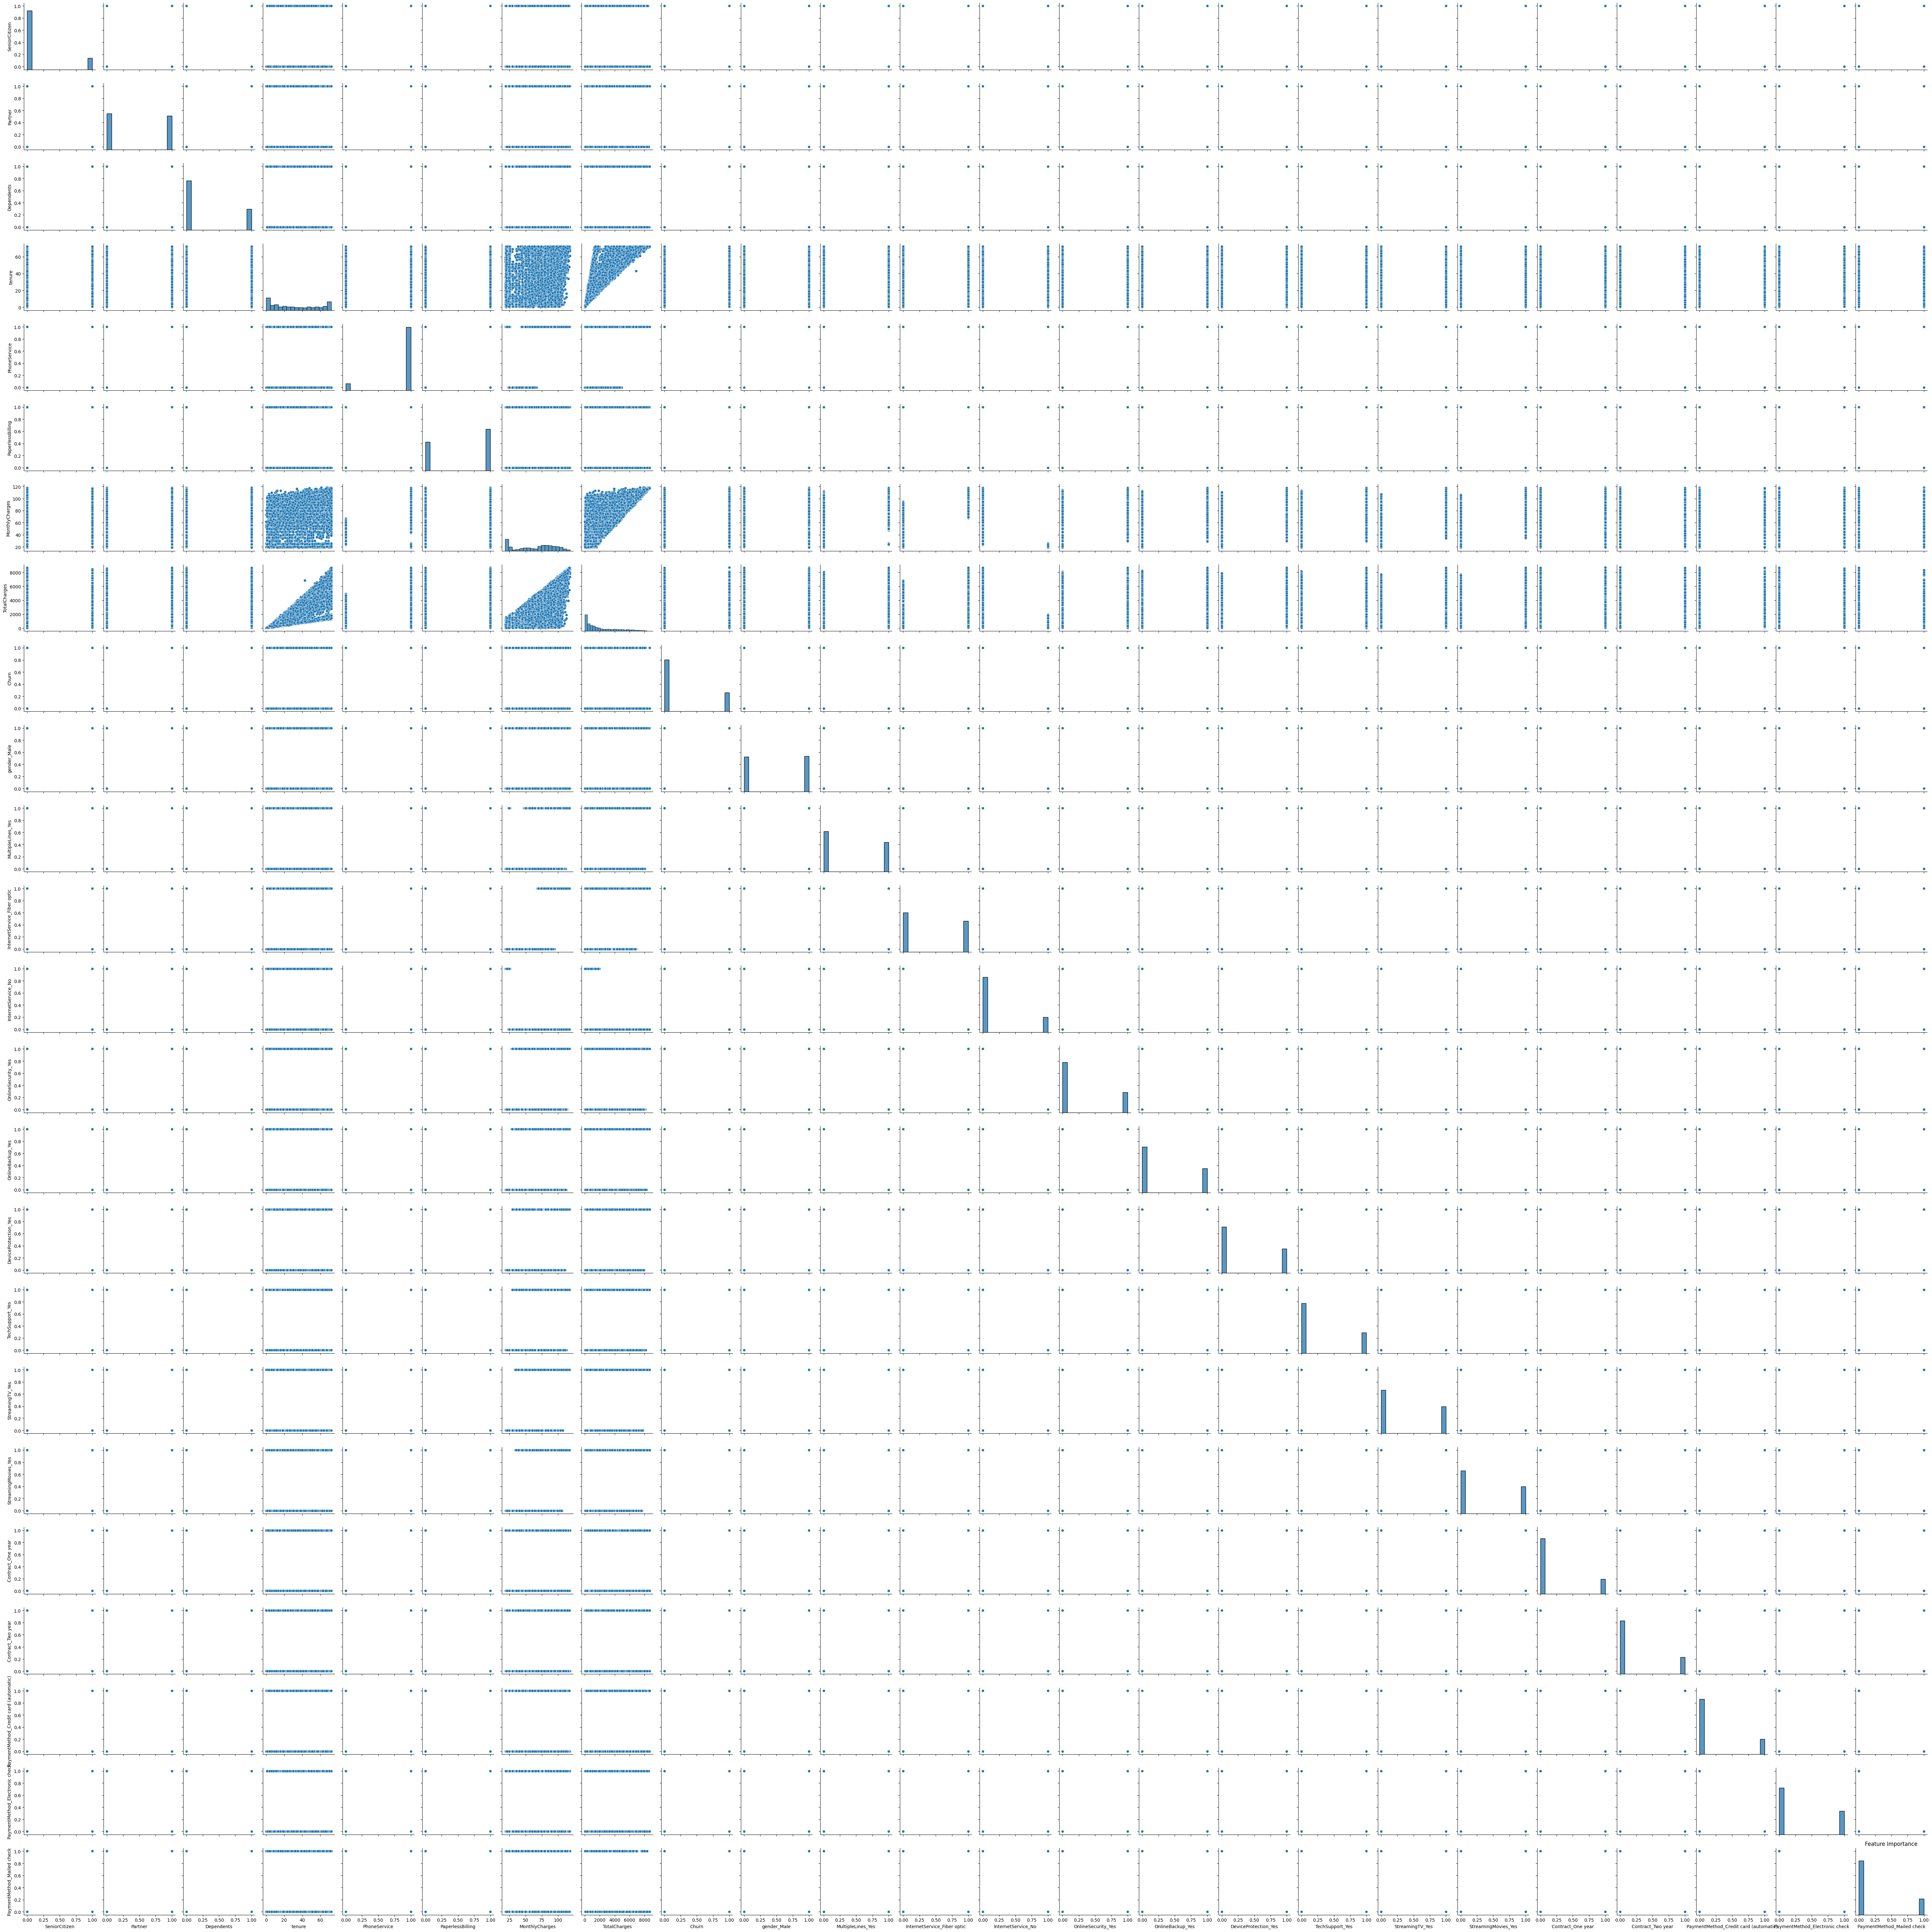

In [59]:
plt.figure(figsize=(10, 6))
sns.pairplot(data=df)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [55]:
# Save to CSV file
df.to_csv('telco_churn_clear_data.csv', index=False)

In [56]:
df.corr()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,...,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.016538,-0.211135,0.016539,0.008556,0.156468,0.220057,0.102849,0.150921,-0.001935,...,0.066614,0.059333,-0.060711,0.105285,0.120219,-0.046229,-0.117083,-0.024102,0.171754,-0.153438
Partner,0.016538,1.000000,0.452722,0.379608,0.017659,-0.014989,0.096642,0.317115,-0.150351,-0.001944,...,0.141583,0.153566,0.119756,0.124470,0.117508,0.082847,0.247775,0.082094,-0.083746,-0.095042
Dependents,-0.211135,0.452722,1.000000,0.159665,-0.001792,-0.111445,-0.113998,0.061872,-0.164156,0.010424,...,0.023737,0.013832,0.063110,-0.016673,-0.039664,0.068413,0.204397,0.060313,-0.150566,0.059119
tenure,0.016539,0.379608,0.159665,1.000000,0.008468,0.006203,0.247948,0.826053,-0.352252,0.005167,...,0.360214,0.360684,0.324256,0.279798,0.286045,0.202532,0.558509,0.232966,-0.208396,-0.233877
PhoneService,0.008556,0.017659,-0.001792,0.008468,1.000000,0.016542,0.247427,0.113274,0.011914,-0.006441,...,-0.052344,-0.071153,-0.096249,-0.022512,-0.032994,-0.002814,0.003601,-0.007745,0.003029,-0.003344
PaperlessBilling,0.156468,-0.014989,-0.111445,0.006203,0.016542,1.000000,0.352247,0.158758,0.191740,-0.011636,...,0.126639,0.103940,0.038056,0.223954,0.211602,-0.051448,-0.147639,-0.013650,0.208763,-0.205448
MonthlyCharges,0.220057,0.096642,-0.113998,0.247948,0.247427,0.352247,1.000000,0.651289,0.193210,-0.014375,...,0.441566,0.482830,0.338503,0.629693,0.627165,0.004804,-0.074312,0.030444,0.271442,-0.377485
TotalCharges,0.102849,0.317115,0.061872,0.826053,0.113274,0.158758,0.651289,1.000000,-0.198434,0.000203,...,0.508853,0.522157,0.432130,0.515128,0.519721,0.170615,0.354807,0.182708,-0.059430,-0.295823
Churn,0.150921,-0.150351,-0.164156,-0.352252,0.011914,0.191740,0.193210,-0.198434,1.000000,-0.008696,...,-0.082188,-0.066267,-0.164774,0.063111,0.061445,-0.177768,-0.302330,-0.134251,0.301961,-0.091632
gender_Male,-0.001935,-0.001944,0.010424,0.005167,-0.006441,-0.011636,-0.014375,0.000203,-0.008696,1.000000,...,-0.013874,-0.001910,-0.008990,-0.008213,-0.010598,0.007953,-0.003444,0.001141,0.000652,0.013666


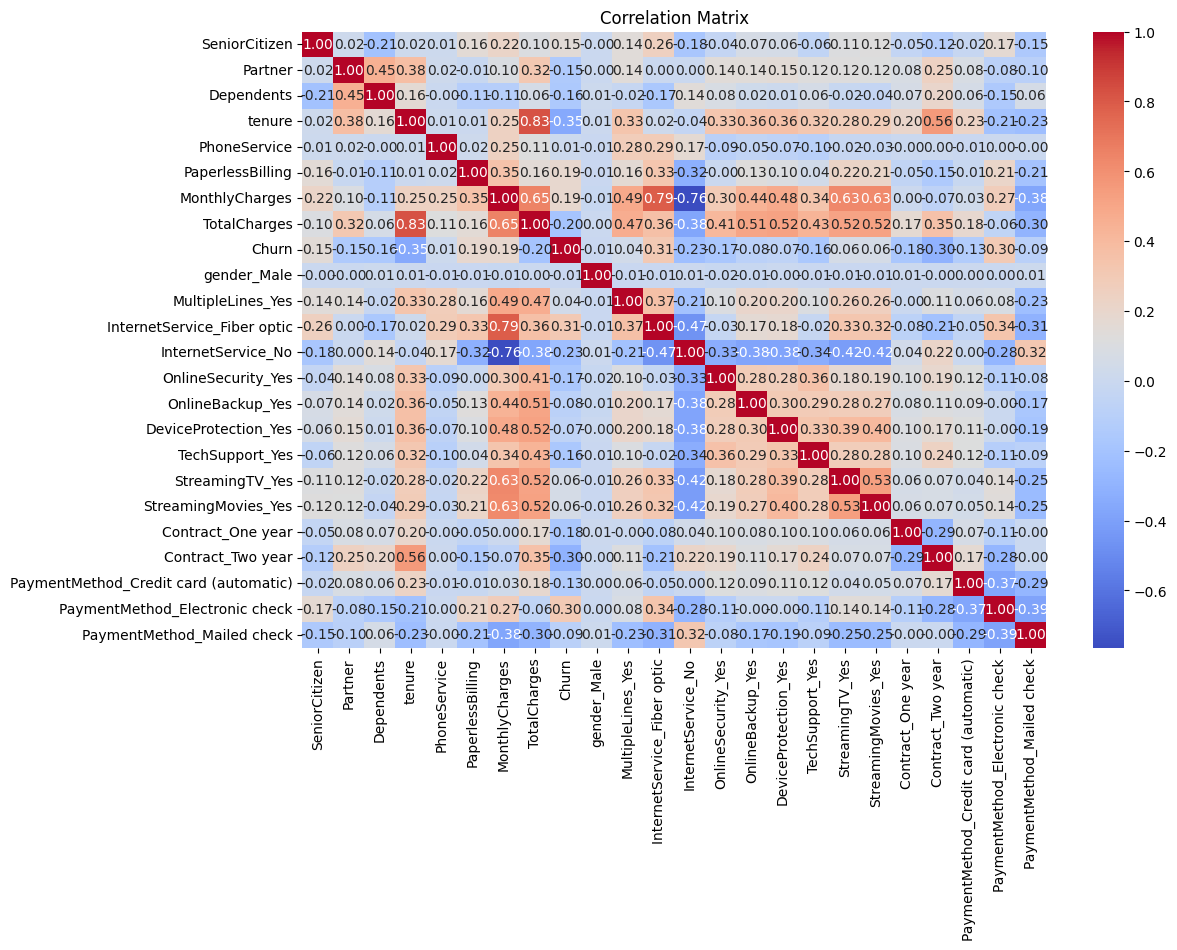

In [ ]:
# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [58]:
# Only numeric columns
corr_with_churn = df.corr(numeric_only=True)['Churn'].sort_values(ascending=False)
corr_with_churn

Churn                                    1.000000
InternetService_Fiber optic              0.307888
PaymentMethod_Electronic check           0.301961
MonthlyCharges                           0.193210
PaperlessBilling                         0.191740
SeniorCitizen                            0.150921
StreamingTV_Yes                          0.063111
StreamingMovies_Yes                      0.061445
MultipleLines_Yes                        0.040172
PhoneService                             0.011914
gender_Male                             -0.008696
DeviceProtection_Yes                    -0.066267
OnlineBackup_Yes                        -0.082188
PaymentMethod_Mailed check              -0.091632
PaymentMethod_Credit card (automatic)   -0.134251
Partner                                 -0.150351
Dependents                              -0.164156
TechSupport_Yes                         -0.164774
OnlineSecurity_Yes                      -0.171326
Contract_One year                       -0.177768


Train-Test Split

In [60]:
#Split into Train/Test Sets

X = df.drop('Churn', axis=1)
y = df['Churn']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [69]:
X_train.shape

(5635, 23)

Scaling / Normalization

In [62]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [70]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
X_train_scaled.shape

(5635, 23)

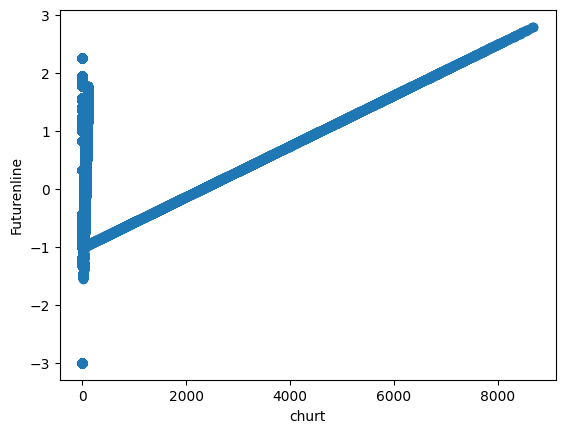

In [72]:
plt.scatter(X_train,X_train_scaled)
plt.xlabel("churt")
plt.ylabel('Futurenline')
plt.show()

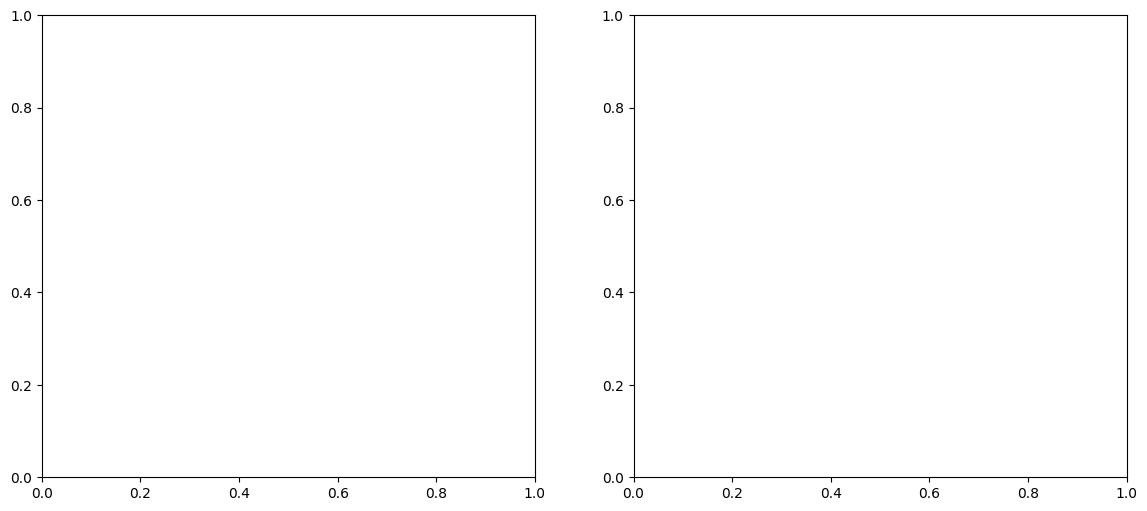

In [73]:
# Plot original and scaled data for comparison (first two features for simplicity)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

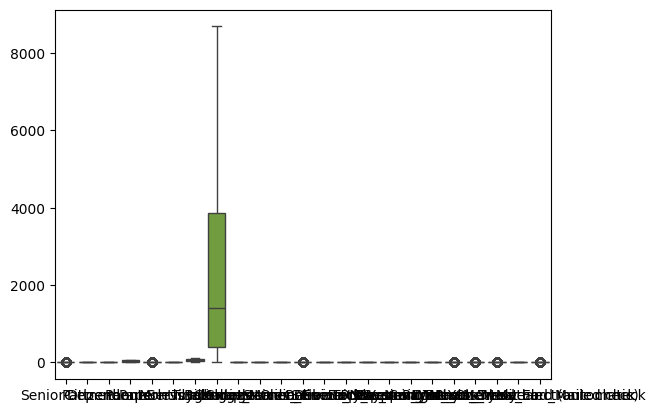

<Figure size 1200x800 with 0 Axes>

In [77]:
# Original data plot
sns.boxplot(data=X_train)
plt.figure(figsize=(12, 8))
plt.tight_layout()
plt.show()

Balancing Imbalanced Classes

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [87]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

In [88]:
#Classification Report

for name, model in models.items():
    model.fit(X_train_scaled, y_train)  # Train model
    y_pred = model.predict(X_test_scaled)  # Predict on test set
    
    print(f"\n📌 Model: {name}")
    print(f"✅ Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("📊 Classification Report:")
    print(classification_report(y_test, y_pred))


📌 Model: Logistic Regression
✅ Accuracy: 0.8034
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409


📌 Model: Decision Tree
✅ Accuracy: 0.7253
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1035
           1       0.48      0.50      0.49       374

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409


📌 Model: Random Forest
✅ Accuracy: 0.7999
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66    

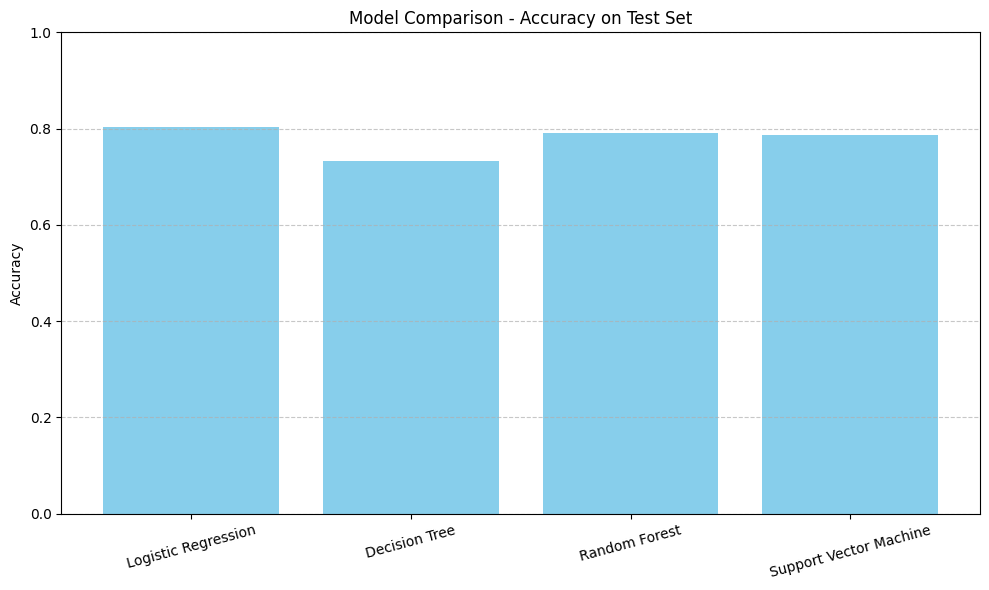

In [89]:
# Train, predict, and collect accuracies
accuracies = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.ylabel('Accuracy')
plt.title('Model Comparison - Accuracy on Test Set')
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Data Transformation or Model Traning 

In [90]:


model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
#Result predict
train_preds = model.predict(X_train_scaled)
test_preds = model.predict(X_test_scaled)

In [92]:
# Accuracy scores
train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)

In [93]:

print(f"Training Accuracy: {train_acc}")
print(f"Test Accuracy: {test_acc}")

Training Accuracy: 0.8067435669920142
Test Accuracy: 0.8034066713981547


In [ ]:
#hyperparameter tuning 

from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#hyperparameter search space

from scipy.stats import uniform
param_space = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': uniform(0.01, 10),             # Regularization strength
    'solver': ['liblinear', 'saga'],    # Must support the chosen penalty
    'fit_intercept': [True, False],
    'max_iter': [100, 200, 500]
}

In [107]:
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_space,
    n_iter=20,  # number of combinations to try
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

In [108]:
random_search.fit(X_train_scaled,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001AC447D1B90>,
                                        'fit_intercept': [True, False],
                                        'max_iter': [100, 200, 500],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42, scoring='accuracy')

In [109]:
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)

Best Parameters: {'C': np.float64(8.09397348116461), 'fit_intercept': True, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}
Best Cross-Validation Accuracy: 0.8063886424134872


In [110]:
best_model = random_search.best_estimator_
best_model

LogisticRegression(C=np.float64(8.09397348116461), max_iter=200, penalty='l1',
                   solver='saga')

In [111]:
y_pred = best_model.predict(X_test_scaled)
y_pred

array([0, 1, 0, ..., 0, 0, 0], shape=(1409,))

In [112]:
print("✅ Best Parameters:", random_search.best_params_)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("✅ Classification Report:\n", classification_report(y_test, y_pred))

✅ Best Parameters: {'C': np.float64(8.09397348116461), 'fit_intercept': True, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}
✅ Accuracy: 0.8019872249822569
✅ Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.55      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



In [ ]:
#tunned_model = LogisticRegression(
 #   C=nb.float64(8.09397348116461),
  #  fit_intercept=True,
   # max_iter=200,
    #penalty='l1',
    #solver='saga'
#)

tunned_model = LogisticRegression(
    class_weight='balanced',
    fit_intercept=True,
    max_iter=1000,
    solver='saga'
)

In [125]:
tunned_model.fit(X_train_scaled, y_train)
y_pred = tunned_model.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7388218594748048
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.51      0.78      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



## Save model and scaler


In [ ]:
import joblib
joblib.dump(model,open('model.pkl','wb'))
joblib.dump(scaler,open('scaler.pkl','wb'))
joblib.dump(X.columns.tolist(),open('model_columns.pkl','wb'))  # Save column structure

['model_columns.pkl']